In [23]:
import numpy as np
import pandas as pd

In [24]:
data = pd.read_csv("Laporanpenjualan.csv")
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data=data.drop(["SKU_number","Order","SoldCount","ReleaseYear"],axis=1)

scdata=pd.DataFrame(sc.fit_transform(data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1)), columns=data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1).columns)
scdata[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]=data[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]

scdata.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type,SoldFlag,MarketingType,New_Release_Flag
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,Historical,0.0,D,1
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,Historical,0.0,D,1
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,Historical,0.0,D,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,Historical,1.0,D,1
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,Historical,1.0,D,1


In [26]:
data=pd.get_dummies(scdata)
data.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


In [27]:
print('data_shape:',data.shape)
print('jumlah field null:',len(data.isnull().any()))
data.isnull().any()

data_shape: (198917, 12)
jumlah field null: 12


ReleaseNumber           False
StrengthFactor          False
PriceReg                False
ItemCount               False
LowUserPrice            False
LowNetPrice             False
SoldFlag                 True
New_Release_Flag        False
File_Type_Active        False
File_Type_Historical    False
MarketingType_D         False
MarketingType_S         False
dtype: bool

In [28]:
from sklearn.model_selection import train_test_split

# variables = data[['ReleaseNumber','StrengthFactor','PriceReg','ItemCount','LowUserPrice','LowNetPrice','New_Release_Flag']]
# results = data['SoldFlag']
# x = variables
# y = results

train=data[data.SoldFlag.notnull()]
xtrain_=train.drop(["SoldFlag"],axis=1)
ytrain_=train.SoldFlag

x = xtrain_
y = ytrain_

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
x_train.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
22530,1.704814,-0.219424,-0.010898,-0.304367,0.286936,0.234357,1,0,1,1,0
63902,-0.365455,-0.476745,0.047325,-0.703929,-0.448593,-0.107709,1,0,1,0,1
33237,0.152112,0.011445,0.174146,0.068557,0.637326,-0.008264,1,0,1,1,0
19334,-0.365455,0.683313,-0.356198,-0.730566,-0.448593,0.090870,1,0,1,1,0
73705,-0.106671,-0.647342,-0.529252,0.308294,-0.002787,-0.076584,1,0,1,0,1


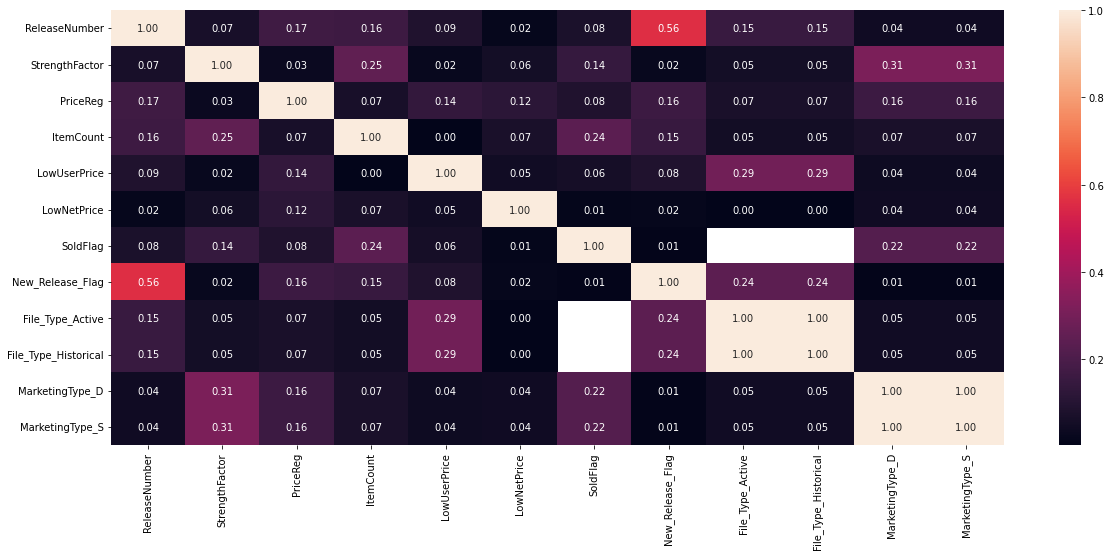

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.corr()
abs_correlation = abs(correlation)
plt.figure(figsize=(20,8))
ax = sns.heatmap(abs_correlation,annot=True,fmt=".2f")
plt.show()

_________________K-Nearest Neighbors_________________
 
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     18860
         1.0       0.42      0.20      0.27      3939

    accuracy                           0.81     22799
   macro avg       0.63      0.57      0.58     22799
weighted avg       0.77      0.81      0.79     22799

Accuracy: 81.35 %


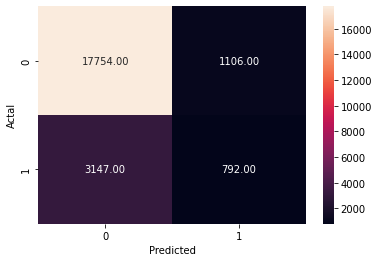

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn=KNeighborsClassifier()
y_pred_knn=knn.fit(x_train,y_train).predict(x_test)

print("_________________K-Nearest Neighbors_________________")
print(" ")
print (classification_report(y_test, y_pred_knn))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_knn) * 100))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()